<a href="https://colab.research.google.com/github/weimarquintero/UDEA-ai4eng-20242/blob/main/04%20-%20modelo%20-%20clasificador%20lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando las librerias necesarias.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


Cargando el archivo resultante del proceso de preprocesado.

In [ ]:
#carga del archivo train.csv con pandas
df_train = pd.read_csv('/content/drive/MyDrive/dataFrame_final.csv')
del(df_train["Unnamed: 0"])
df_train.head()
#df_train.shape

,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,RENDIMIENTO_GLOBAL
0,6.25,0.5,3,1,2
1,3.25,0.0,3,0,0
2,3.25,3.5,3,1,0
3,4.75,0.0,4,1,3
4,3.25,2.5,3,1,1


Trabajando sobre la columna de rendimiento.

In [ ]:
y_col = 'RENDIMIENTO_GLOBAL'
df_train = df_train[sorted(df_train.columns)]

X = df_train[[c for c in df_train.columns if c!=y_col]].values
y = df_train[y_col].values
X.shape, y.shape

((692500, 4), (692500,))

Creando el split de entrenamiento y el de test mediante el archivo de train.

In [ ]:
from sklearn.model_selection import train_test_split
Xtr, Xts, ytr, yts = train_test_split(X,y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 4), (138500, 4), (554000,), (138500,))

Creando y entrenando el clasificador lineal.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(Xtr, ytr)

LogisticRegression()

In [ ]:
preds_tr = lr.predict(Xtr)
preds_ts = lr.predict(Xts)

In [ ]:
print (preds_tr[:10])
print (preds_ts[:10])

[3 3 0 3 1 3 3 0 1 3]
[0 0 0 2 1 3 3 0 1 0]


In [ ]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(0.34697292418772563, 0.3473718411552347)

In [ ]:
from sklearn.metrics import confusion_matrix
cm_tr = confusion_matrix(ytr, preds_tr)
cm_ts = confusion_matrix(yts, preds_ts)

# normalize by class
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

In [ ]:
!pip install rlxutils

  Preparing metadata (setup.py) ... done
  Created wheel for rlxutils: filename=rlxutils-0.1.10-py3-none-any.whl size=11100 sha256=e8b585309ec16ed245361fda276ef50894494fedd9b5fd25632e7a7e2617db6e
  Stored in directory: /root/.cache/pip/wheels/9a/45/da/49bdb0e82cc7a605e9c05dc24265687c5f349b53dcb74728e2
Successfully built rlxutils


Analizando la matriz de confusion.

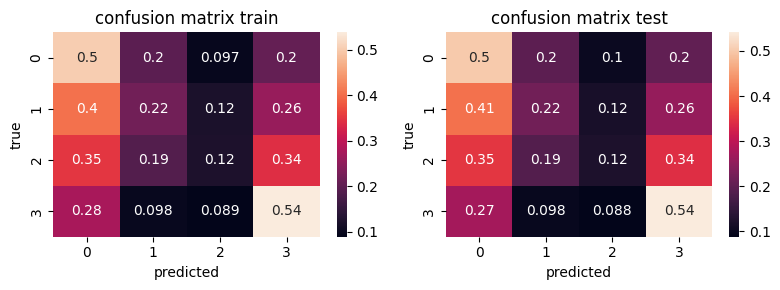

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt
import seaborn as sns
for ax,i in subplots(2, usizex=4):
  if i==0: sns.heatmap(cm_tr, annot=True); plt.title("confusion matrix train")
  if i==1: sns.heatmap(cm_ts, annot=True); plt.title("confusion matrix test")
  plt.ylabel("true")
  plt.xlabel("predicted")

Encontramos que nos arroja una predicion buena, sin embargo, exploraremos otro modelo para validar si se nos aumenta un poco la media de prediccion. Esto lo haremos en el notebook final.